In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import numpy as np
from sklearn import tree
from sklearn import ensemble 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt

First, let's import the data about wines, which can be done directly via sklearn:

In [146]:
data = load_wine()
datadf = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['type'])
datadf['type']=datadf['type'].astype(int)

In [147]:
datadf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Classification based on raw data with all features

In [148]:
features, target = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=42)

#### The simplest classifier: decision tree

In [149]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.88      0.89        33
          1       0.86      0.91      0.89        34
          2       1.00      0.95      0.98        22

avg / total       0.91      0.91      0.91        89



#### Random forest classifier with different number of trees

In [150]:
n_ests = np.arange(1, 30)
acc_scores = []
for n_est in n_ests:
    clf = ensemble.RandomForestClassifier(n_estimators=n_est)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))

Text(0.5,0,'number of estimators')

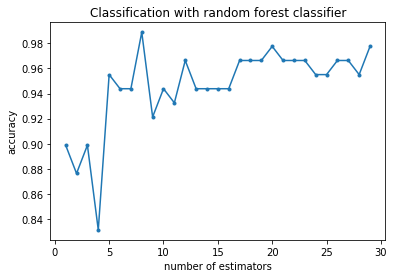

In [151]:
plt.plot(n_ests, acc_scores, '.-')
plt.title("Classification with random forest classifier")
plt.ylabel("accuracy")
plt.xlabel("number of estimators")

#### Naive Bayes

In [152]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98        33
          1       0.97      1.00      0.99        34
          2       1.00      1.00      1.00        22

avg / total       0.99      0.99      0.99        89

